In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from random import *
import time

In [2]:
#converts x,y for plotting
def convert(x,y):
    a = []
    for i in range(len(x)):
        a.append([x[i],y[i]])
    return np.array(a,np.int32)

#get square coordinates
def get_square(x,y,side):
    side = side/2
    r = [x-side,x+side,x+side,x-side]
    c = [y-side,y-side,y+side,y+side]
    return convert(r,c)

#get triangle coordinates
def get_triangle(r,c,height = 9):
    side = np.sqrt(4*((height)**2)/3)
    x = height/3
    r0 = [r,r+side/2,r-side/2]
    c0=  [c-2*x,c+x,c+x]
    return convert(r0,c0)

#draw box around the image
def box(a,size = 50):
    p = get_square(80,80,100) 
    k = cv2.polylines(a,[p.reshape((-1,1,2))],True,color=(255,255,255),thickness=5)
    return k

#draws image for given color and shape
#shape 0 - triangle and 1- square
def draw(color,shape):
    a = np.zeros((160,160,3))
    if shape == 0 :
        p = get_triangle(80,80,80)
    if shape == 1 :
        p = get_square(80,80,80)
    k = cv2.polylines(a,[p.reshape((-1,1,2))],True,color=(0,0,0),thickness=1)
    k = cv2.fillPoly(a,[p],color)
    return k

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


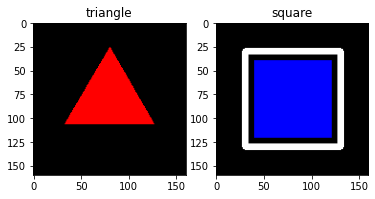

In [3]:
#draw shape triangle 
red = (255,0,0)
blue = (0,0,255)
x = draw(red,0)
plt.subplot(1,2,1)
plt.imshow(x,cmap=cm.Greys)
plt.title('triangle')
plt.subplot(1,2,2)

#draw shape square and box
x = draw(blue,1)
x= box(x)
plt.imshow(x,cmap=cm.Greys)
plt.title('square')
plt.show()

# Q1

In [4]:
def complexcell(img):
    rot = [np.pi,np.pi/2,np.pi/3,np.pi*0.66]
    filter = []
    shape = []
    #creating filters
    for i in rot:
        filter.append(cv2.getGaborKernel((13,13),3.1,i,np.pi/4,1,0))

    #passing image through filters    
    for i in range(len(rot)):
        x = cv2.filter2D(img,-1,filter[i])
        x = cv2.dilate(x, kernel = np.ones((5,5)),iterations=1)
        x = cv2.erode(x,kernel = np.ones((5,5)),iterations=2)
        #thresholding 
        x[x>80]=255
        x[x<=80]=0
        if x.mean() > 0.2 :
            shape.append(1)
        else:
            shape.append(0)
    if shape[1]==1 and shape[2]==1 and shape[3]==1 and shape[0]==0:
        return 'triangle'
    elif shape[1]==1 and shape[0]==1 and shape[2]==0 and shape[3]==0:
        return 'square' 
    else:
        return 'another'

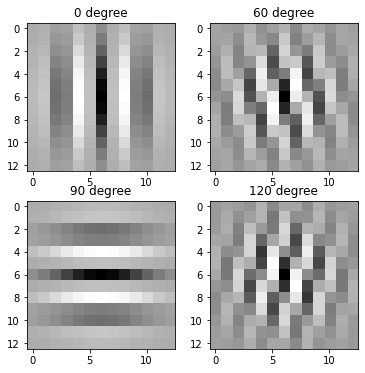

In [5]:
x1 = cv2.getGaborKernel((13,13),3.1,0,np.pi/4,1,0)
x2 = cv2.getGaborKernel((13,13),3.1,np.pi/3,np.pi/4,1,0)
x3 = cv2.getGaborKernel((13,13),3.1,np.pi/2,np.pi/4,1,0)
x4 = cv2.getGaborKernel((13,13),3.1,np.pi*0.66,np.pi/4,1,0)

fig ,ax = plt.subplots(figsize=(6,6))
#plotting the filters used for complex cell
plt.subplot(2,2,1)
plt.imshow(x1,cmap=cm.Greys)
plt.title('0 degree')
plt.subplot(2,2,2)
plt.imshow(x2,cmap=cm.Greys)
plt.title('60 degree')
plt.subplot(2,2,3)
plt.imshow(x3,cmap=cm.Greys)
plt.title('90 degree')
plt.subplot(2,2,4)
plt.imshow(x4,cmap=cm.Greys)
plt.title('120 degree')
plt.show()

Example for sqaure side detection

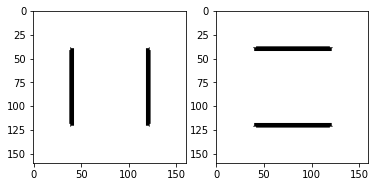

In [6]:
x = draw(blue,1)
img = x[:,:,2]
x = cv2.filter2D(img,-1,x1)
x = cv2.dilate(x, kernel = np.ones((5,5)),iterations=1)
x = cv2.erode(x,kernel = np.ones((5,5)),iterations=2)
x[x>80]=255
x[x<=80]=0
plt.subplot(1,2,1)
plt.imshow(x,cmap=cm.Greys)
x = cv2.filter2D(img,-1,x3)
x = cv2.dilate(x, kernel = np.ones((5,5)),iterations=1)
x = cv2.erode(x,kernel = np.ones((5,5)),iterations=2)
x[x>80]=255
x[x<=80]=0
plt.subplot(1,2,2)
plt.imshow(x,cmap=cm.Greys)

Example for triangle Side detection

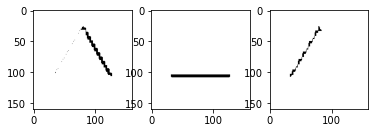

In [7]:
x = draw(blue,0)
img = x[:,:,2]
x = cv2.filter2D(img,-1,x2)
x = cv2.dilate(x, kernel = np.ones((5,5)),iterations=1)
x = cv2.erode(x,kernel = np.ones((5,5)),iterations=2)
x[x>80]=255
x[x<=80]=0
plt.subplot(1,3,1)
plt.imshow(x,cmap=cm.Greys)
x = cv2.filter2D(img,-1,x3)
x = cv2.dilate(x, kernel = np.ones((5,5)),iterations=1)
x = cv2.erode(x,kernel = np.ones((5,5)),iterations=2)
x[x>80]=255
x[x<=80]=0
plt.subplot(1,3,2)
plt.imshow(x,cmap=cm.Greys)
x = cv2.filter2D(img,-1,x4)
x = cv2.dilate(x, kernel = np.ones((5,5)),iterations=1)
x = cv2.erode(x,kernel = np.ones((5,5)),iterations=2)
x[x>80]=255
x[x<=80]=0
plt.subplot(1,3,3)
plt.imshow(x,cmap=cm.Greys)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Output of complex cell - square


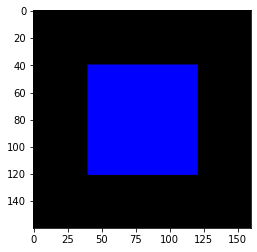

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Output of complex cell - triangle


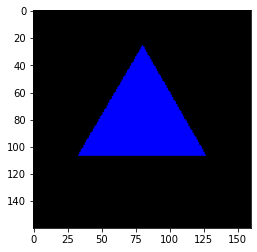

In [8]:
#complex cell output for both images
x = draw(blue,1)
img = x[:,:,2]
print('Output of complex cell - ' + complexcell(img))
plt.imshow(x)
plt.show()
x = draw(blue,0)
img = x[:,:,2]
print('Output of complex cell - ' + complexcell(img))
plt.imshow(x)
plt.show()

# Q2

In [9]:
#creating paradigm for the experiment 
#mode 0 - feature search 1 - conjuction search
#do not pass object number greater than 100
def get_paradigm(mode, object):
    back = np.zeros((1600,1600,3))
    a = [k for k in range(100)]
    a = np.array(sample(a,object))
    if mode==0:
        sel = randint(0,1)      
        color = [(255,0,0),(0,0,255)]
        odd = randint(0,1)
        color_odd = color[odd]
        color =color[1-odd]
        shape = [0,1]
        current = sample(shape,1)
        odd = 1 - current[0]
        for i in range(len(a)-1):
            row = (a[i]//10)*160
            col = (a[i]%10)*160
            back[row:row+160,col:col+160] = draw(color,current[0])
        row = (a[-1]//10)*160
        col = (a[-1]%10)*160

        if sel ==0: 
            back[row:row+160,col:col+160] = draw(color,odd)
            return back,a
        else:            
            back[row:row+160,col:col+160] = draw(color_odd,current[0])
            return back,a
    else : 
        red = (255,0,0)
        blue = (0,0,255)
        total = [(0,red),(1,red),(1,blue),(0,blue)]
        odd = sample(total,1)
        not_odd = list(set(total)-set(odd))
        for i in range(len(a)-1):
            current = sample(not_odd,1)
            row = (a[i]//10)*160
            col = (a[i]%10)*160
            back[row:row+160,col:col+160] = draw(current[0][1],current[0][0])
        row = (a[-1]//10)*160
        col = (a[-1]%10)*160
        back[row:row+160,col:col+160] = draw(odd[0][1],odd[0][0])
        return back,a

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


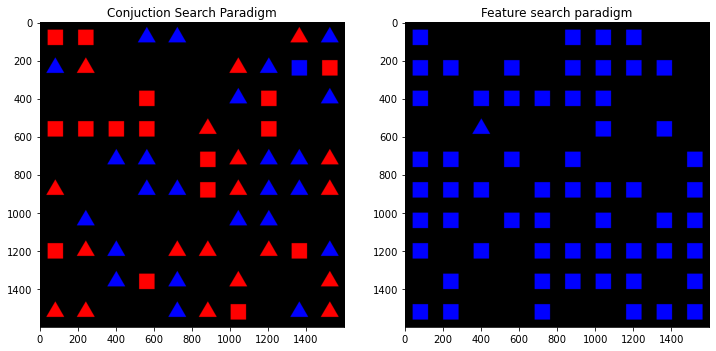

In [10]:
#plotting the paradigm for both search
a,b = get_paradigm(1,60)
fig ,ax = plt.subplots(figsize=(12,12))
plt.subplot(1,2,1)
plt.title('Conjuction Search Paradigm')
plt.imshow(a)
plt.subplot(1,2,2)
a,b = get_paradigm(0,60)
plt.title('Feature search paradigm')
plt.imshow(a)

# Q3

In [11]:
#for any paradigm return the features of each object 
def get_features(a,b):
    color = []
    shape = []
    b.sort()
    for i in range(len(b)):
        row = (b[i]//10)*160
        col = (b[i]%10)*160
        img = a[row:row+160,col:col+160][:]
        blue = np.array([0,0,255])
        if np.all(img[80][80] == blue):
            color.append('blue')
            current = 2
        else:
            color.append('red')
            current = 0
        img1 = img[:,:,current]
        shape.append(complexcell(img1))
    return color,shape

In [12]:
#returns the odd element index for feature search
def feature_search(b,shape,color):
    time.sleep(0.01)
    if len(np.unique(color))==1:
        shape = np.array(shape)
        square = np.where(shape=='square')[0]
        triangle = np.where(shape=='triangle')[0]
        if len(square)==1:
            return b[square[0]]
        else:
            return b[triangle[0]]
    else:
        color = np.array(color)
        blue = np.where(color=='blue')[0]
        red = np.where(color=='red')[0]
        if len(blue)==1:
            return b[blue[0]]
        else:
            return b[red[0]]

#returns the odd element index for conjuction search
def conjuction_search(b,shape,color):
    red_square = []
    red_triangle = []
    blue_square = []
    blue_triangle = []
    for i in range(len(b)):
        time.sleep(0.1)
        if color[i]=='red':
            if shape[i]=='square':
                red_square.append(b[i])
            else:
                red_triangle.append(b[i]) 
        else:
            if shape[i]=='square':
                blue_square.append(b[i]) 
            else:
                blue_triangle.append(b[i])

    if len(red_square)==1:
        #print('redsq')
        return red_square[0]
    elif len(red_triangle)==1:
        #print('redtri')
        return red_triangle[0]
    elif len(blue_square)==1:
        #print('bluesq')
        return blue_square[0]
    elif len(blue_triangle)==1:
        #print('bluetri')
        return blue_triangle[0]

In [13]:
#passing the paradigm returns the time and odd element
def search(b,a):  
    #pre-attention time is ignore
    color,shape = get_features(a,b)
    if len(np.unique(shape))==1 or len(np.unique(color))==1:
        start = time.time()
        x = feature_search(b,shape,color)
        end = time.time() - start
        return x,end
    else:
        start = time.time()
        x = conjuction_search(b,shape,color)
        end = time.time()-start
        return x,end

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


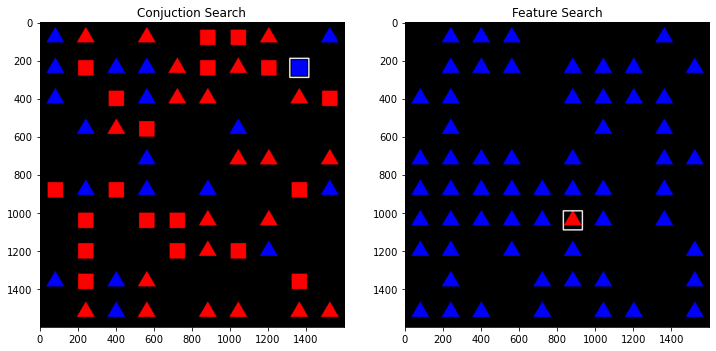

In [14]:
#plotting the paradigm and odd element
#for conjuction search
a,b = get_paradigm(1,60)
fig ,ax = plt.subplots(figsize=(12,12))
plt.subplot(1,2,1)
x,end = search(b,a)
row = (x//10)*160
col = (x%10)*160
a[row:row+160,col:col+160] = box(a[row:row+160,col:col+160])
plt.title('Conjuction Search')
plt.imshow(a)

#for feature search
plt.subplot(1,2,2)
a,b = get_paradigm(0,60)
x,end = search(b,a)
row = (x//10)*160
col = (x%10)*160
a[row:row+160,col:col+160] = box(a[row:row+160,col:col+160])
plt.title('Feature Search')
plt.imshow(a)

In [15]:
#calulating the time for both feature and conjuction
time_f = []
x_axis = []
time_c = []
for i in range(20,101):
    #print(i)
    a,b = get_paradigm(1,i)
    x,end = search(b,a)
    x_axis.append(i)
    time_c.append(end)
    a,b = get_paradigm(0,i)
    x,end = search(b,a)
    time_f.append(end)

Graph for time vs number of objects

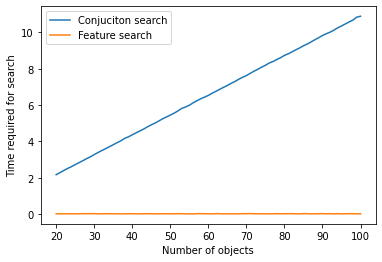

In [16]:
plt.plot(x_axis,time_c,label='Conjuciton search')
plt.plot(x_axis,time_f,label='Feature search')
plt.xlabel('Number of objects')
plt.ylabel('Time required for search')
plt.legend()
plt.show()

For conjcution search the time increases and for feature search the time reamins constant as the number of objects increases.